<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/06.01-Empirical-Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical gain tuning

This notebook were inspired in this video.

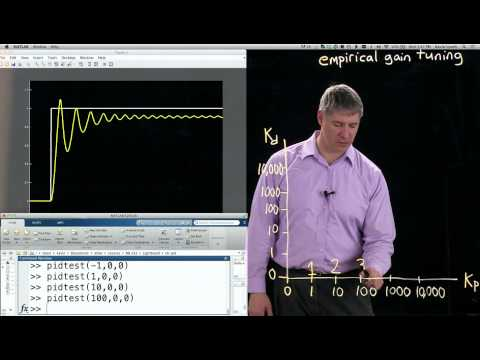

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('uXnDwojRb1g')

## Summary

Let's try to empirical tune an real PID controller of a servo control loop given the process reaction curve transfer function $G_a(s)G_p(s)G_m(s)$.

## Initializations

In [1]:
from requests import get
!pip install control
from inspect import getsource

# Tip: https://changhsinlee.com/colab-import-python/
url = 'https://raw.githubusercontent.com/gmxavier/FAT0413150/main/src/utils.py'
r = get(url)
with open('utils.py', 'w') as f:
    f.write(r.text)

from utils import pidtest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 5.1 MB/s eta 0:00:00


## Simulation function

We wrapped the simulation and plot processes in the `pidtest` function:

In [2]:
print(getsource(pidtest))

def pidtest(Kp, Ki, Kd, 
            a     = 0.1,
            M     = 1,
            num   = [1e-1],
            den   = [20**2, 2*0.5*20, 1],
            theta = 0,
            tpar  = [0, 10*20, 1000, 25], #start, stop, N, t0
            test  = True,
            out   = False):
    r'''Simulates a closed-loop (servo control) with a PID controller (filtered derivative) or an open-loop
    step test for process reaction curve data.

    Parameters
    ----------
    Kp : float
         Proportional gain, [-] 
    Ki : float
         Integral gain, [1/time]   
    Kd : float
         Derivative gain, [time] 
    a  : float
         Derivative filter factor [-]
    M  : float
         Step amplitude
    num : array
         Process reaction curve transfer function numerator coefficients        
    den : array
         Process reaction curve transfer function denominator coefficients        
    theta : float
         Process reaction curve transfer function dead time, [time]
    tpar :

## Tuning process

Similiar to the inspirational video, let's first try a PID controller with only the P action and $K_p = -1$.

/usr/local/lib/python3.10/dist-packages/control/timeresp.py:1003: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


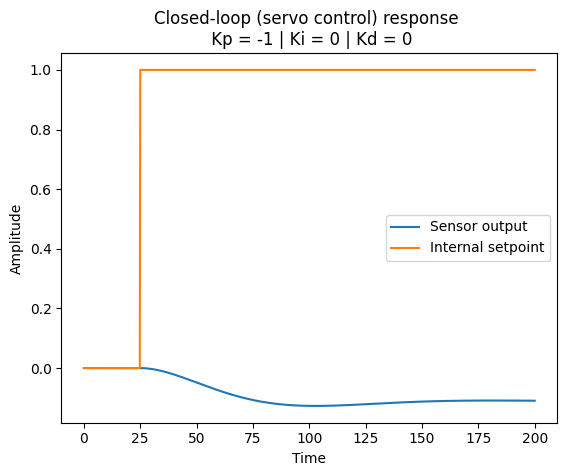

In [3]:
pidtest(-1,0,0) # run 0

It's clear that the controller gain choosen has the wrong sign.

It must have a positive sign instead of a negative one. Let's correct the sign and try again.

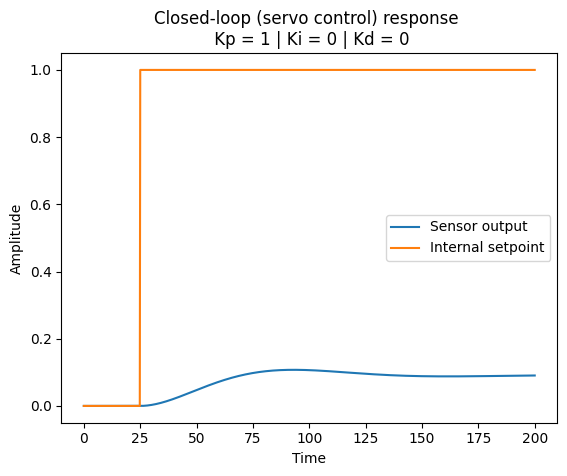

In [4]:
pidtest(1,0,0) # run 1

The offset is to high! Let's increase the P action gain one order of magnitude and see what happens.

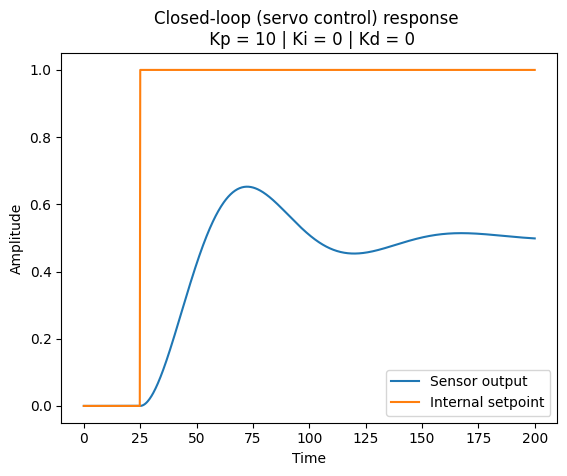

In [5]:
pidtest(10,0,0) # run 2

The offset was reduced, but it is almost 50% yet. Let's increase the P action gain one order of magnitude again and see what happens.

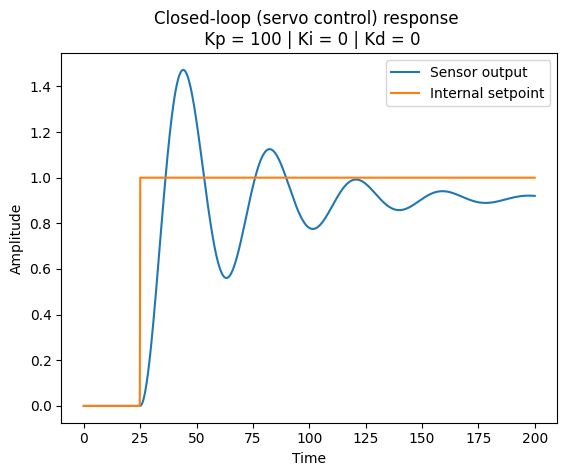

In [6]:
pidtest(100,0,0) # run 3

The offset was reduced again (as the theory tells us) and now it is only 10%.

Let's increase the P action gain one order of magnitude again and see what happens.

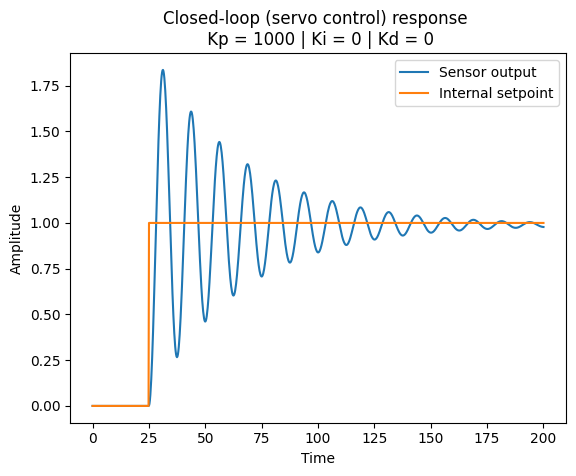

In [7]:
pidtest(1000,0,0) # run 4

The offset is nearly 0%, but this reduction came with a lot of oscillation and an overshoot of more than 75%.

Let's back to the earlier value of the P action and try to improve the performance by using the D action.

Now, let's do the same process with the D action gain starting with $K_d = 1$.

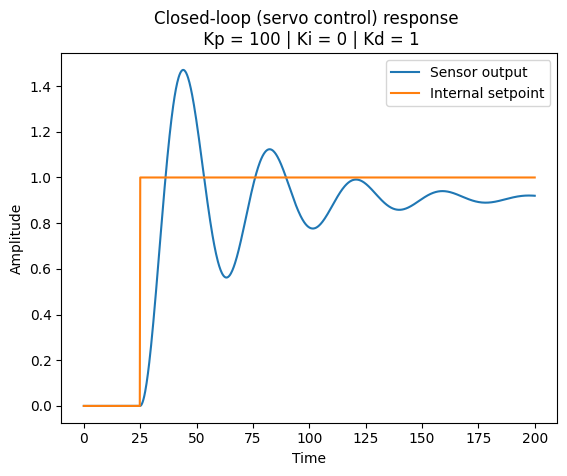

In [8]:
pidtest(100,0,1) # run 5

We need more damping, let's try increase the D action gain one order of magnitude.

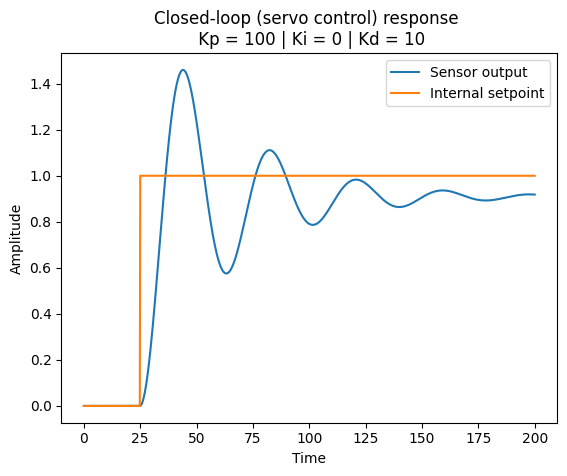

In [9]:
pidtest(100,0,10) # run 6

More damping, please!

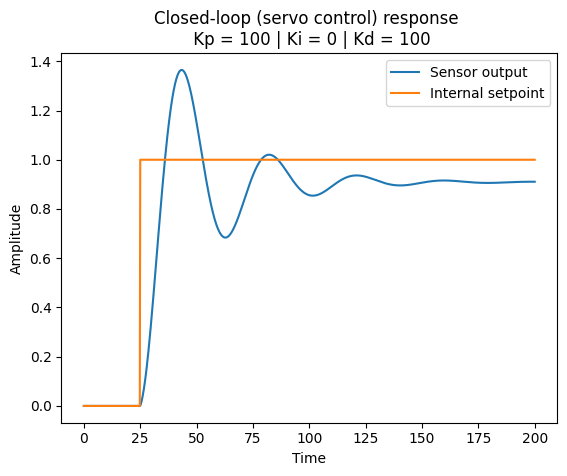

In [10]:
pidtest(100,0,100) # run 7

More damping again, please!

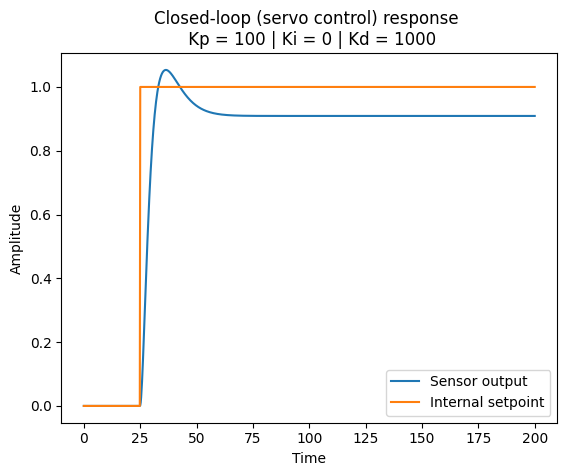

In [11]:
pidtest(100,0,1000) # run 8

Just a bit more damping.

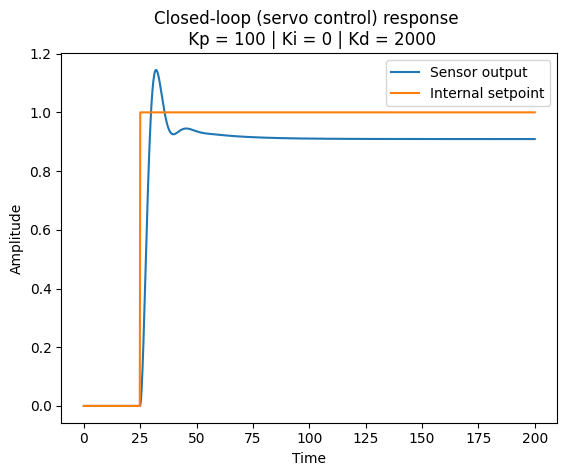

In [12]:
pidtest(100,0,2000) # run 9

The theory also tell us that neither P action or D action alone or even combined are able to eliminate offset.

So, we will need the I action in order to get rid of this offset.

Now, let's do the same process with the I action gain starting with $K_i = 1$.

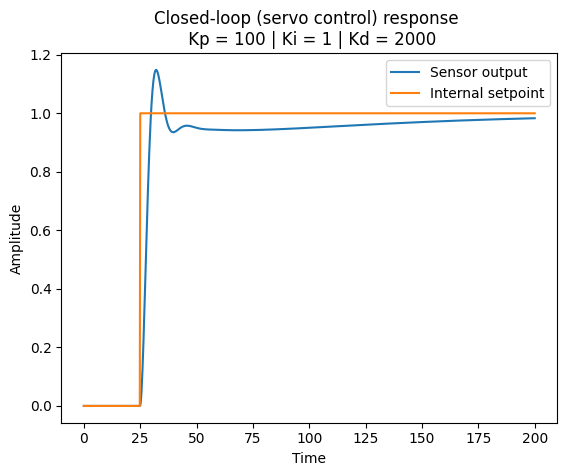

In [13]:
pidtest(100,1,2000) # run 10

Not enough I action, let's increase it.

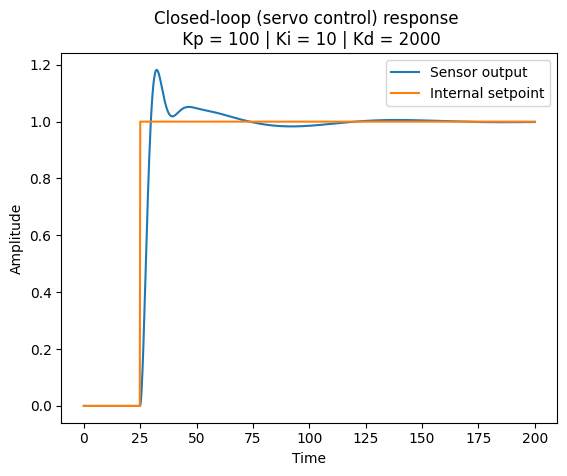

In [14]:
pidtest(100,10,2000) # run 11

The offset was eliminated, but what will happen if we increase more the I action?

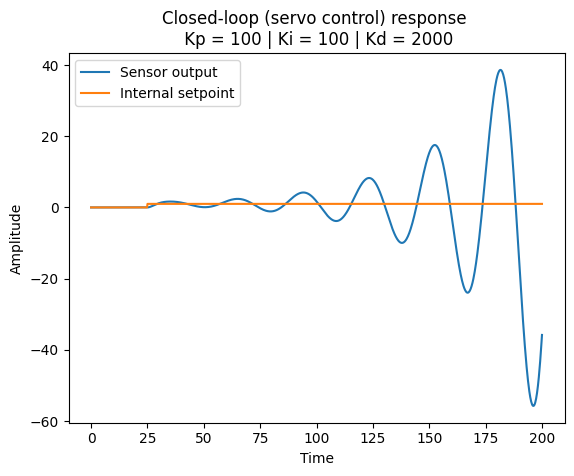

In [15]:
pidtest(100,100,2000) # run 12

Ops! Something thing really bad happens, didn't it?

The control loop becames unstable due too much I action.

Let's move back to the earlier I action gain value, but reducing it by half in order to eliminate the small overshoot observed.

In another words, let's try $K_i = 5$.

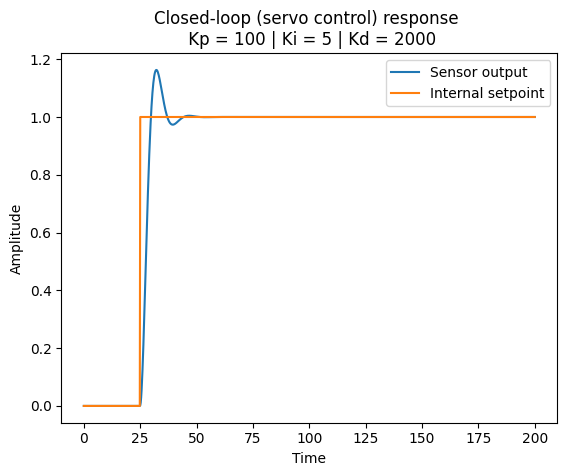

In [16]:
pidtest(100,5,2000) # run 13

Wunderbar! We achieve a fast closed loop response with no overshoot!

The PID tuning settings from our empirical tuning process are $K_p = 100$, $K_i = 5$ and $K_d = 2000$.

Let's zooming the closed loop response to see in detail how fast it is.

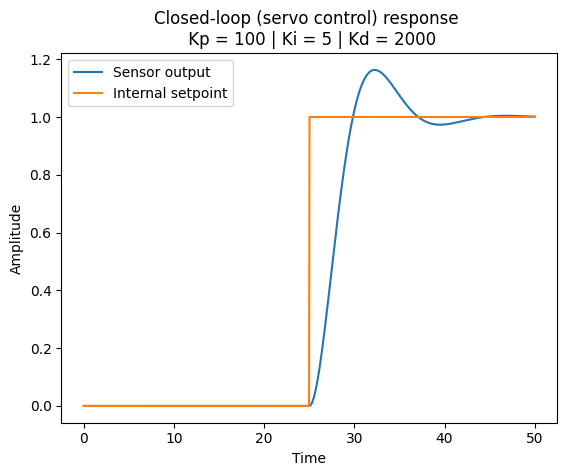

In [17]:
pidtest(100,5,2000,tpar=[0, 50, 1000, 25])